In [1]:
import numpy as np 
import pandas as pd 
import os
from time import time
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from matplotlib import rcParams
%matplotlib inline
le = preprocessing.LabelEncoder()
from numba import jit
import itertools
from seaborn import countplot,lineplot, barplot
from numba import jit
from scipy.stats import randint as sp_randint


import matplotlib.style as style 
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
import gc
gc.enable()


train_x=pd.read_csv("D:/data/X_train.csv")
train_y=pd.read_csv("D:/data/y_train.csv")
test=pd.read_csv("D:/data/X_test.csv")

In [2]:
print(train_x.columns)
print(train_y.columns)
print(train_y[['series_id','group_id']][0:10])
print(train_x.describe())#了解数据的行列，数目，对数据有个基本了解


Index(['row_id', 'series_id', 'measurement_number', 'orientation_X',
       'orientation_Y', 'orientation_Z', 'orientation_W', 'angular_velocity_X',
       'angular_velocity_Y', 'angular_velocity_Z', 'linear_acceleration_X',
       'linear_acceleration_Y', 'linear_acceleration_Z'],
      dtype='object')
Index(['series_id', 'group_id', 'surface'], dtype='object')
   series_id  group_id
0          0        13
1          1        31
2          2        20
3          3        31
4          4        22
5          5         1
6          6        34
7          7        31
8          8        33
9          9        11
           series_id  measurement_number  orientation_X  orientation_Y  \
count  487680.000000       487680.000000  487680.000000  487680.000000   
mean     1904.500000           63.500000      -0.018050       0.075062   
std      1099.853353           36.949327       0.685696       0.708226   
min         0.000000            0.000000      -0.989100      -0.989650   
25%       95

In [3]:
group_divid=pd.pivot_table(train_y[['surface','group_id','series_id']],index=['surface','group_id'])#按照不同的surface，把group_id 分类
#group_divide=train_y[['surface','group_id']].groupby('surface')
print(group_divid)#分组聚合，体现surface，group之间的关系

                                   series_id
surface                group_id             
carpet                 7          907.321429
                       25         872.705882
                       52        2526.909091
                       60        2707.901408
concrete               0          910.508772
                       5          792.555556
                       12         858.210526
                       20         770.508772
                       31         919.314815
                       32         858.280702
                       39        2869.985714
                       41        2822.171429
                       42        2814.414286
                       47        2787.342857
                       50        2574.600000
                       57        2501.756098
                       61        2719.085714
                       62        2778.200000
                       63        3038.882353
fine_concrete          13         828.438596
          

In [4]:
totalt = train_x.isnull().sum().sort_values(ascending=False)
percent = (train_x.isnull().sum()/train_x.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
missing_data.tail()#查找缺失数据


,Total,Percent
orientation_Y,0,0.0
orientation_X,0,0.0
measurement_number,0,0.0
series_id,0,0.0
row_id,0,0.0


In [5]:
totalt = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/train_x.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
missing_data.tail()

,Total,Percent
orientation_Y,0,0.0
orientation_X,0,0.0
measurement_number,0,0.0
series_id,0,0.0
row_id,0,0.0


In [6]:
print(train_x['series_id'][:].max())

3809


In [7]:
print(train_x['measurement_number'].max())#每一种series 都是128个

127


In [8]:
print(train_y['group_id'].nunique())

73


Index(['concrete', 'soft_pvc', 'wood', 'tiled', 'fine_concrete',
       'hard_tiles_large_space', 'soft_tiles', 'carpet', 'hard_tiles'],
      dtype='object')
concrete                  779
soft_pvc                  732
wood                      607
tiled                     514
fine_concrete             363
hard_tiles_large_space    308
soft_tiles                297
carpet                    189
hard_tiles                 21
Name: surface, dtype: int64


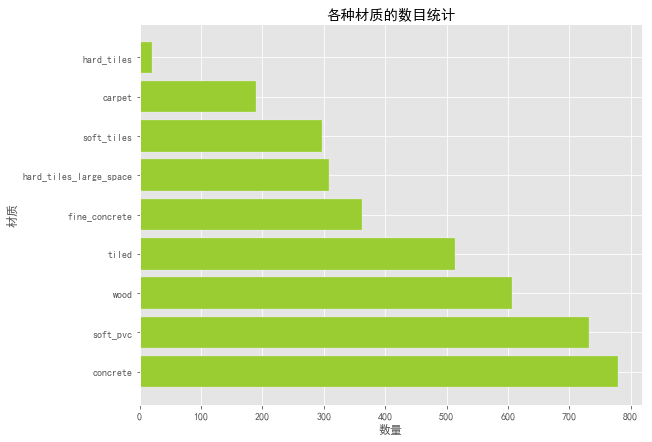

In [9]:
plt.rcParams['font.sans-serif'] = 'SimHei'## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
print(train_y['surface'].value_counts().index)
print(train_y['surface'].value_counts())
plt.figure(figsize=(9,7))## 设置画布
plt.barh(range(9),train_y['surface'].value_counts(),color='yellowgreen',edgecolor='white',linewidth='0.2')
plt.xlabel('数量')## 添加横轴标签
plt.ylabel('材质')## 添加y轴名称
plt.yticks(range(9),train_y['surface'].value_counts().index)
plt.title('各种材质的数目统计')## 添加图表标题

plt.show()

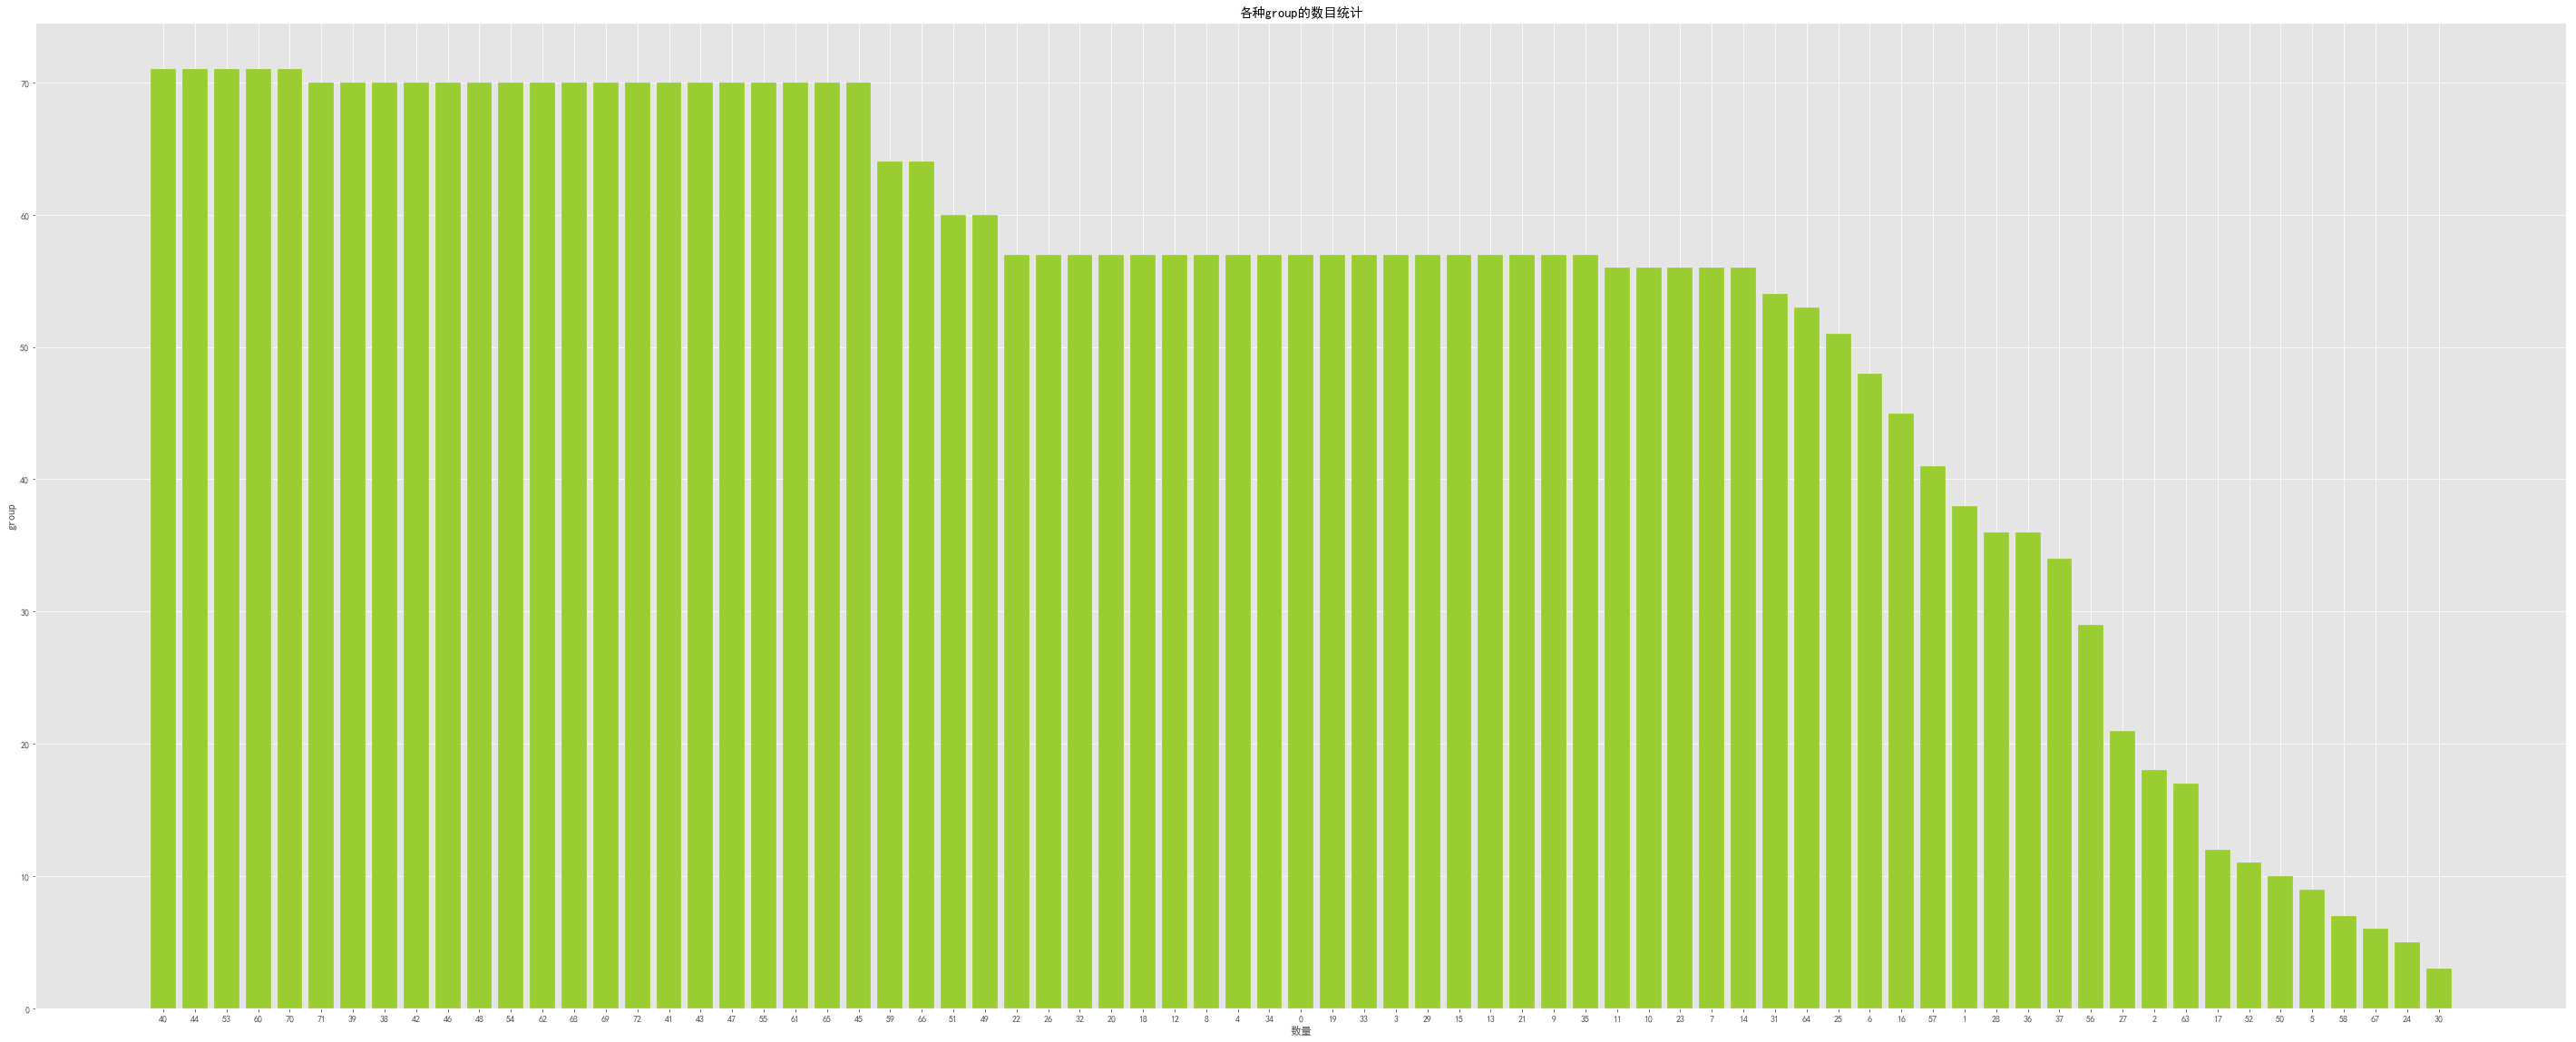

In [10]:
plt.figure(figsize=(50,20))## 设置画布
plt.bar(range(73),train_y['group_id'].value_counts(),color='yellowgreen',edgecolor='white',linewidth='0.2')
plt.xlabel('数量')## 添加横轴标签
plt.ylabel('group')## 添加y轴名称
plt.xticks(range(73),train_y['group_id'].value_counts().index)
plt.title('各种group的数目统计')## 添加图表标题
plt.show()

In [11]:
serie1 = train_x.head(128)
print(serie1.head())

  row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0       -0.75853       -0.63435   
1    0_1          0                   1       -0.75853       -0.63434   
2    0_2          0                   2       -0.75853       -0.63435   
3    0_3          0                   3       -0.75852       -0.63436   
4    0_4          0                   4       -0.75852       -0.63435   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0       -0.10488       -0.10597            0.107650            0.017561   
1       -0.10490       -0.10600            0.067851            0.029939   
2       -0.10492       -0.10597            0.007275            0.028934   
3       -0.10495       -0.10597           -0.013053            0.019448   
4       -0.10495       -0.10596            0.005135            0.007652   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0            0.000767               -0.

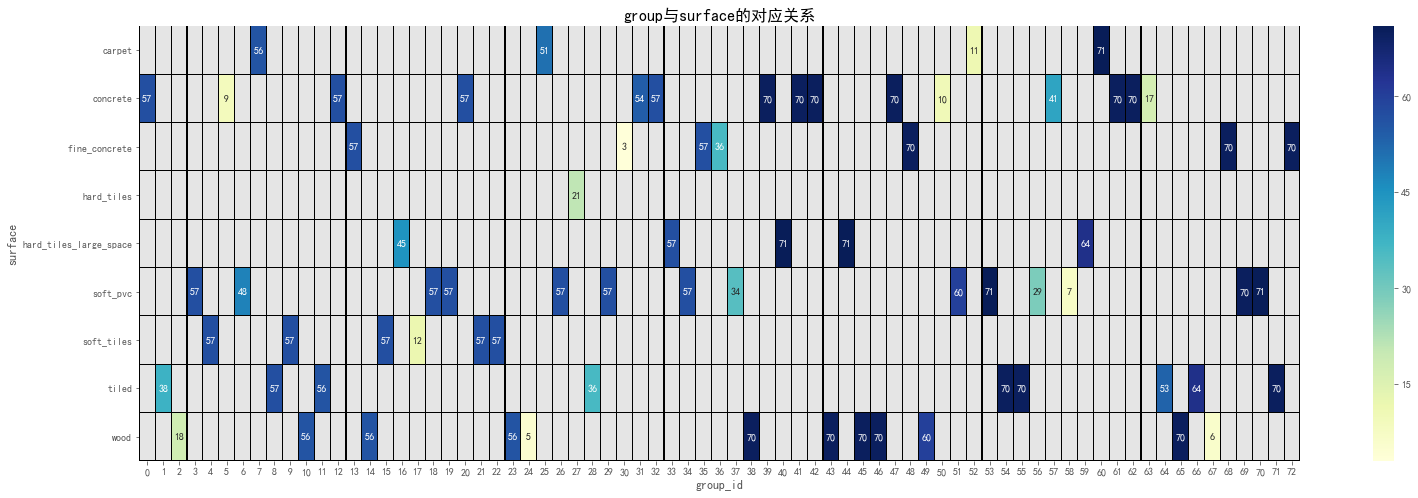

In [12]:
fig, ax = plt.subplots(1,1,figsize=(26,8))
tmp = pd.DataFrame(train_y.groupby(['group_id', 'surface'])['series_id'].count().reset_index())
m = tmp.pivot(index='surface', columns='group_id', values='series_id')
s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
s.set_title('group与surface的对应关系', size=16)
plt.show()


In [13]:
serie1 = train_x.head(128)
serie1.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


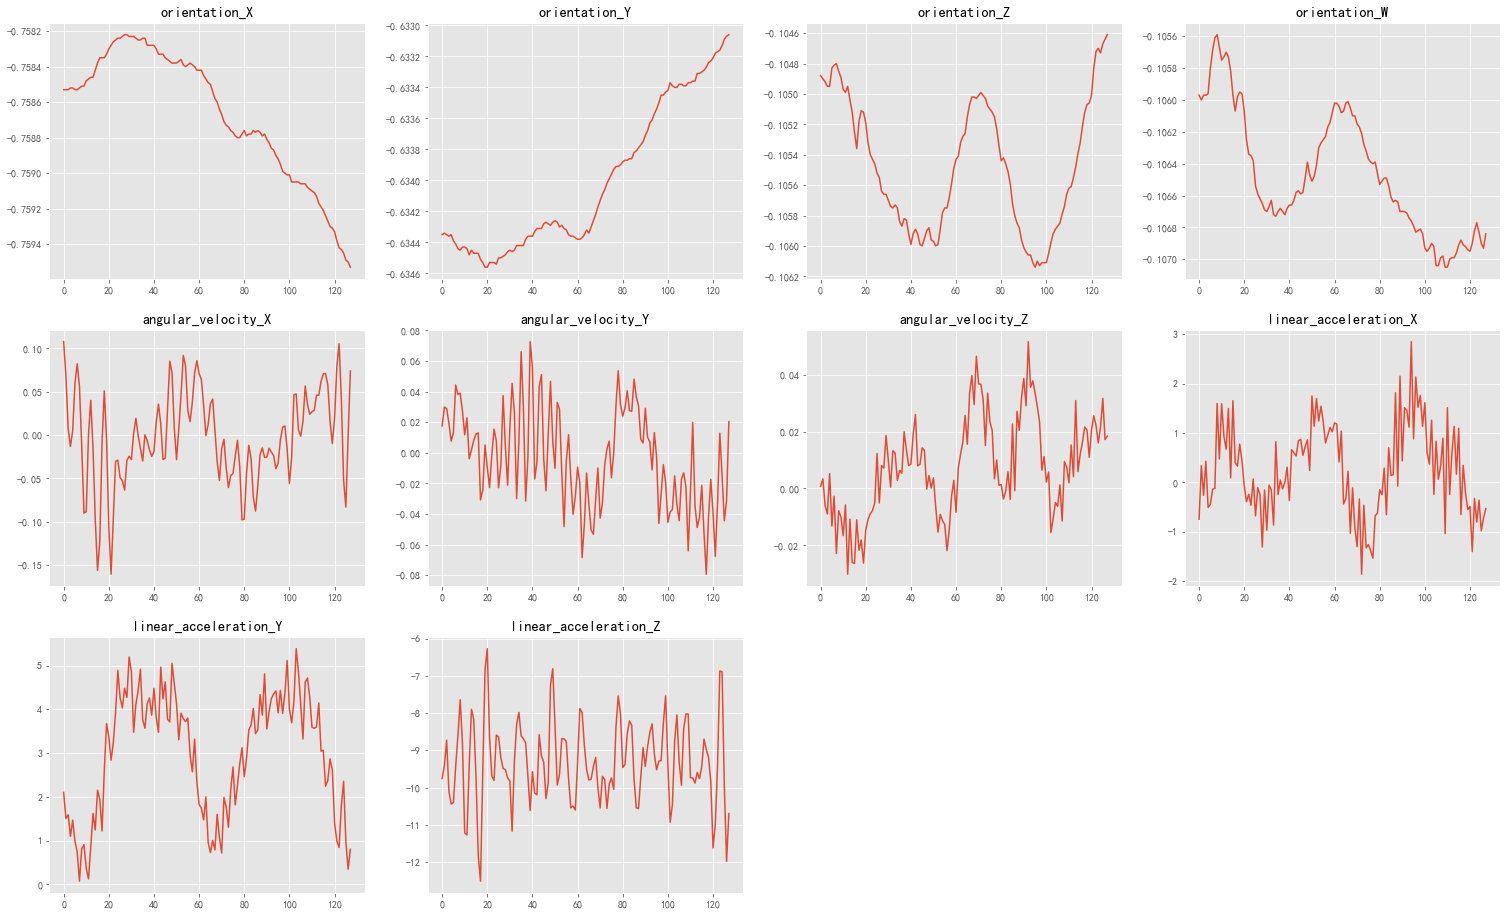

In [14]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(serie1.columns[3:]):
    plt.subplot(3, 4, i + 1)
    plt.plot(serie1[col])
    
    plt.title(col)

del series_dict
gc.collect()
def plotSeries(series_id):
    style.use('ggplot')
    plt.figure(figsize=(28, 16))
    print(train_y[train_y['series_id'] == series_id]['surface'].values[0].title())
    for i, col in enumerate(series_dict[series_id].columns[3:]):
        if col.startswith("o"):
            color = 'red'
        elif col.startswith("a"):
            color = 'green'
        else:
            color = 'blue'
        if i >= 7:
            i+=1
        plt.subplot(3, 4, i + 1)
        plt.plot(series_dict[series_id][col], color=color, linewidth=3)
        plt.title(col)

id_series = 15
plotSeries(id_series)



plt.scatter(train_x['orientation_W'][:],train_x['angular_velocity_X'][:])
plt.legend(['sin','cos1','cos2'])
plt.show()

series_dict = {}
for series in (data['series_id'].unique()):
    series_dict[series] = data[data['series_id'] == series]
    def plotSeries(series_id):
    style.use('ggplot')
    plt.figure(figsize=(28, 16))
    print(target[target['series_id'] == series_id]['surface'].values[0].title())
    for i, col in enumerate(series_dict[series_id].columns[3:]):
        if col.startswith("o"):
            color = 'red'
        elif col.startswith("a"):
            color = 'green'
        else:
            color = 'blue'
        if i >= 7:
            i+=1
        plt.subplot(3, 4, i + 1)
        plt.plot(series_dict[series_id][col], color=color, linewidth=3)
        plt.title(col)

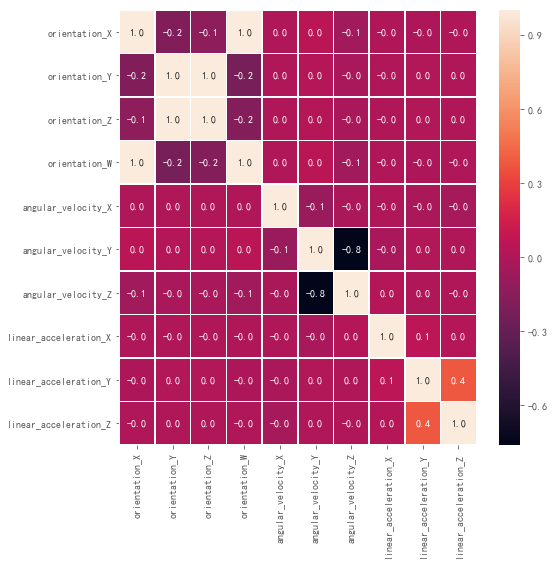

In [15]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(train_x.iloc[:,3:].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

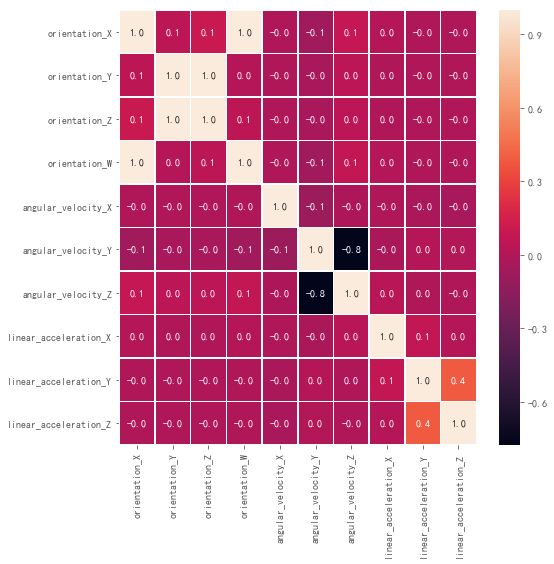

In [16]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(test.iloc[:,3:].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [17]:
print(train_y['group_id'][:].describe())
print(train_y['series_id'][:].describe())

count    3810.000000
mean       37.601312
std        20.982743
min         0.000000
25%        19.000000
50%        39.000000
75%        55.000000
max        72.000000
Name: group_id, dtype: float64
count    3810.000000
mean     1904.500000
std      1099.996591
min         0.000000
25%       952.250000
50%      1904.500000
75%      2856.750000
max      3809.000000
Name: series_id, dtype: float64


In [18]:
diction1=dict(zip(train_y['series_id'],train_y['group_id']))
#diction2=dict(zip(train_y['group_id'],train_y['surface']))
print(diction1)
#print(diction2)

{0: 13, 1: 31, 2: 20, 3: 31, 4: 22, 5: 1, 6: 34, 7: 31, 8: 33, 9: 11, 10: 26, 11: 1, 12: 25, 13: 25, 14: 12, 15: 7, 16: 7, 17: 21, 18: 8, 19: 9, 20: 11, 21: 33, 22: 22, 23: 28, 24: 9, 25: 15, 26: 13, 27: 27, 28: 11, 29: 33, 30: 9, 31: 9, 32: 35, 33: 32, 34: 20, 35: 12, 36: 1, 37: 25, 38: 34, 39: 23, 40: 13, 41: 14, 42: 35, 43: 23, 44: 15, 45: 27, 46: 26, 47: 30, 48: 32, 49: 3, 50: 32, 51: 9, 52: 9, 53: 20, 54: 25, 55: 22, 56: 35, 57: 35, 58: 7, 59: 22, 60: 32, 61: 28, 62: 29, 63: 16, 64: 3, 65: 32, 66: 8, 67: 28, 68: 20, 69: 3, 70: 0, 71: 12, 72: 3, 73: 34, 74: 23, 75: 35, 76: 9, 77: 13, 78: 29, 79: 35, 80: 9, 81: 1, 82: 34, 83: 10, 84: 35, 85: 15, 86: 20, 87: 26, 88: 9, 89: 23, 90: 29, 91: 26, 92: 30, 93: 13, 94: 0, 95: 22, 96: 10, 97: 14, 98: 33, 99: 11, 100: 13, 101: 21, 102: 10, 103: 26, 104: 13, 105: 19, 106: 4, 107: 21, 108: 29, 109: 19, 110: 23, 111: 13, 112: 18, 113: 12, 114: 4, 115: 6, 116: 18, 117: 15, 118: 25, 119: 16, 120: 1, 121: 17, 122: 29, 123: 19, 124: 33, 125: 32, 126

In [19]:
def dic(x):
    return diction1[x]
tr=train_x['series_id'].aggregate(dic)
print(tr)

0         13
1         13
2         13
3         13
4         13
5         13
6         13
7         13
8         13
9         13
10        13
11        13
12        13
13        13
14        13
15        13
16        13
17        13
18        13
19        13
20        13
21        13
22        13
23        13
24        13
25        13
26        13
27        13
28        13
29        13
          ..
487650    56
487651    56
487652    56
487653    56
487654    56
487655    56
487656    56
487657    56
487658    56
487659    56
487660    56
487661    56
487662    56
487663    56
487664    56
487665    56
487666    56
487667    56
487668    56
487669    56
487670    56
487671    56
487672    56
487673    56
487674    56
487675    56
487676    56
487677    56
487678    56
487679    56
Name: series_id, Length: 487680, dtype: int64


<Figure size 432x288 with 0 Axes>

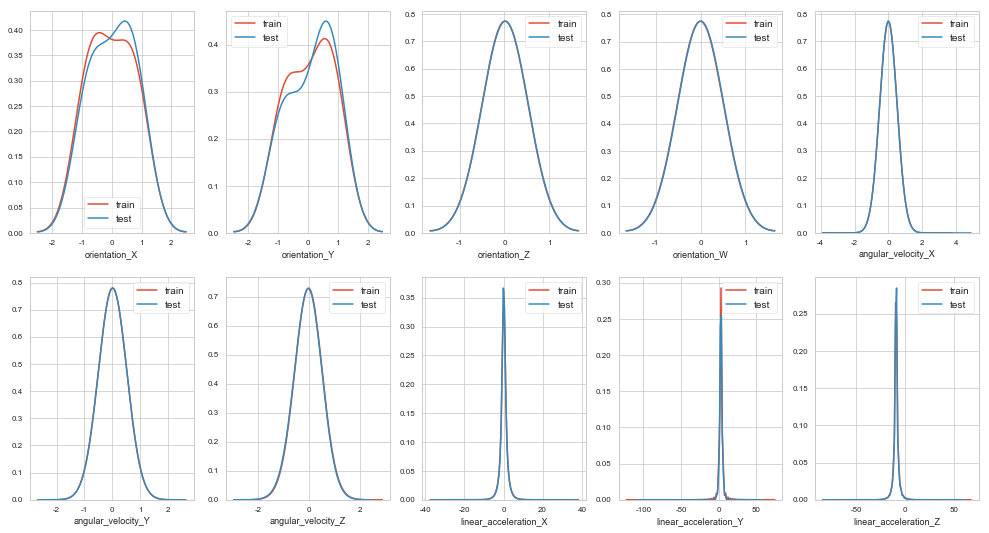

In [20]:
def plot_feature_distribution(df1, df2, label1, label2, features,a=2,b=5):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(a,b,figsize=(17,9))

    for feature in features:
        i += 1
        plt.subplot(a,b,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show()
features = train_x.columns.values[3:]
plot_feature_distribution(train_x, test, 'train', 'test', features)


In [21]:
def plot_feature_class_distribution(classes,tt, features,a=5,b=2):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(a,b,figsize=(16,24))

    for feature in features:
        i += 1
        plt.subplot(a,b,i)
        for clas in classes:
            ttc = tt[tt['surface']==clas]
            sns.kdeplot(ttc[feature], bw=0.5,label=clas)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

<Figure size 432x288 with 0 Axes>

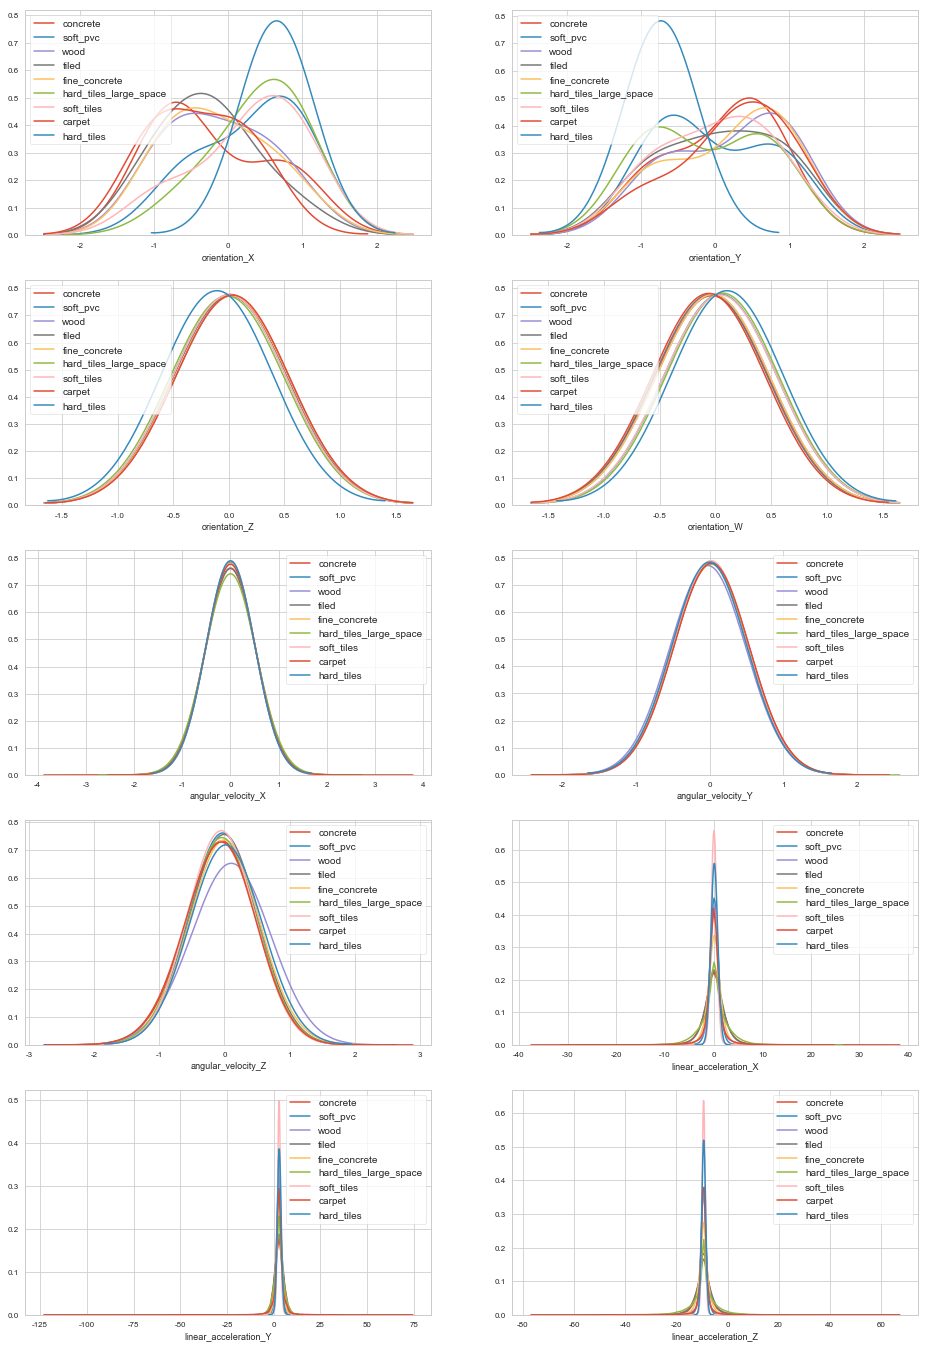

In [22]:
classes = (train_y['surface'].value_counts()).index
aux = train_x.merge(train_y, on='series_id', how='inner')
plot_feature_class_distribution(classes, aux, features)


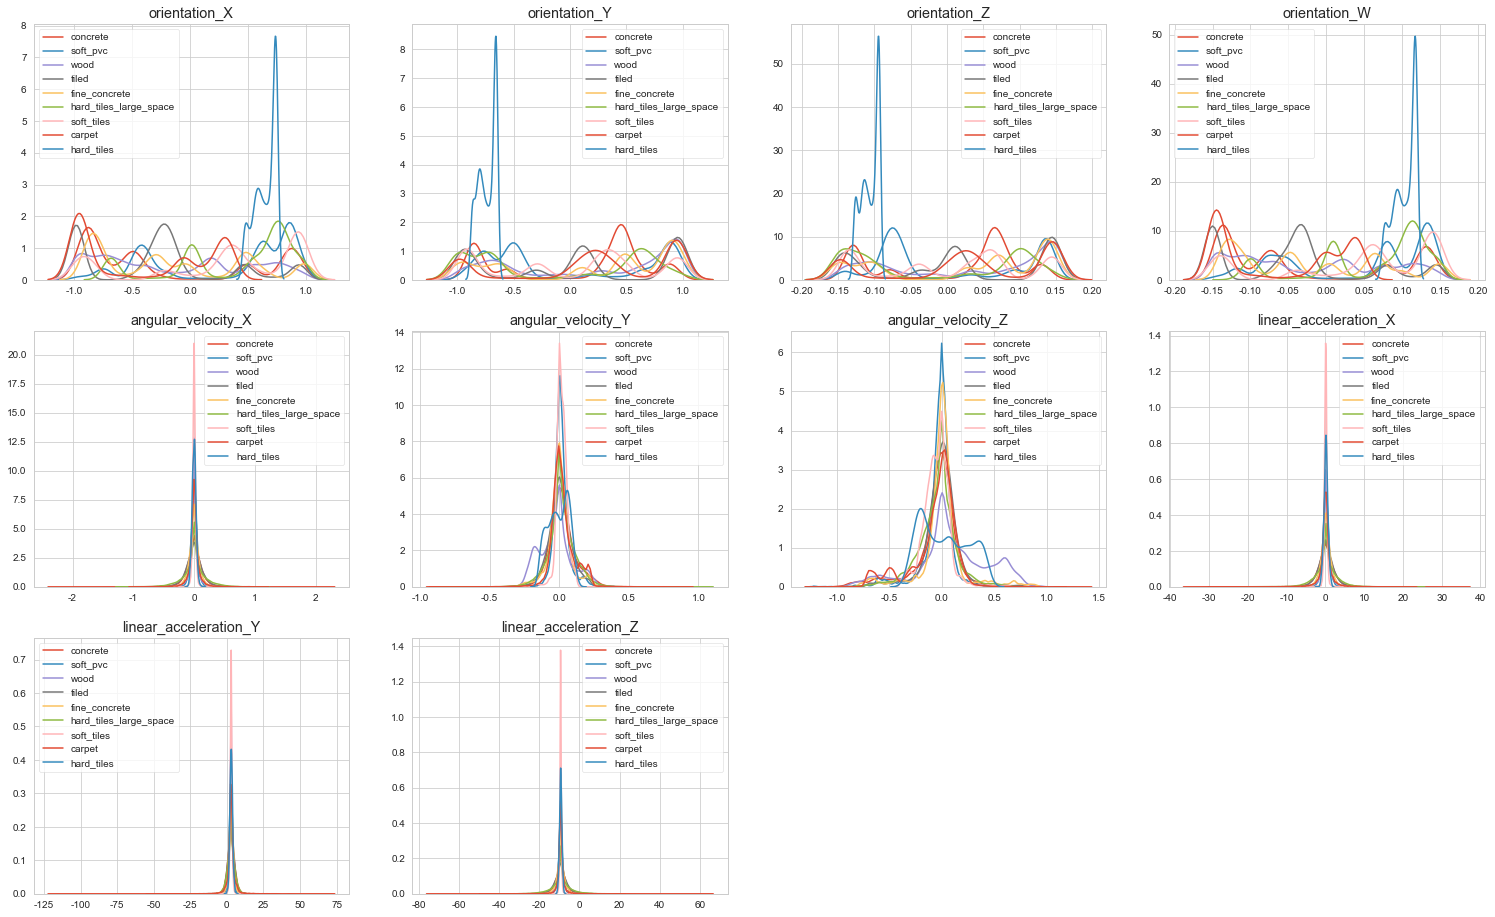

In [23]:
plt.figure(figsize=(26, 16))
for i,col in enumerate(aux.columns[3:13]):
    ax = plt.subplot(3,4,i+1)
    ax = plt.title(col)
    for surface in classes:
        surface_feature = aux[aux['surface'] == surface]
        sns.kdeplot(surface_feature[col], label = surface)

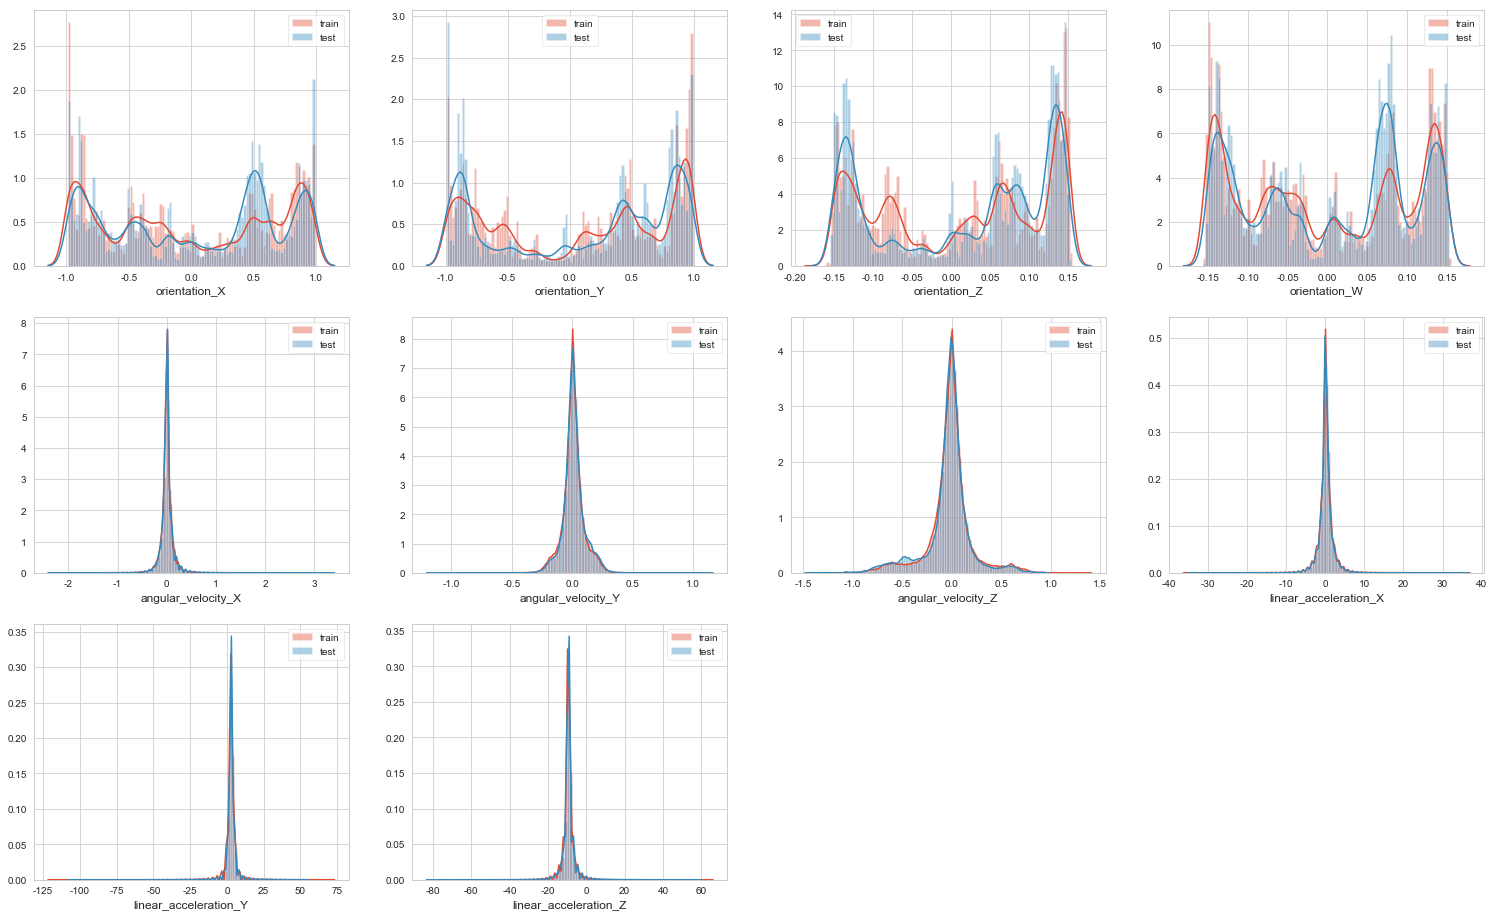

In [24]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(train_x.columns[3:]):
    ax = plt.subplot(3, 4, i + 1)
    sns.distplot(train_x[col], bins=100, label='train')
    sns.distplot(test[col], bins=100, label='test')
    ax.legend()   

In [25]:
def quaternion_to_euler(x, y, z, w):
    import math
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    X = math.atan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    Y = math.asin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    Z = math.atan2(t3, t4)

    return X, Y, Z

In [26]:
def fe_step0 (actual):
    
    # https://www.mathworks.com/help/aeroblks/quaternionnorm.html
    # https://www.mathworks.com/help/aeroblks/quaternionmodulus.html
    # https://www.mathworks.com/help/aeroblks/quaternionnormalize.html
    
    # Spoiler: you don't need this ;)
    
    actual['norm_quat'] = (actual['orientation_X']**2 + actual['orientation_Y']**2 + actual['orientation_Z']**2 + actual['orientation_W']**2)
    actual['mod_quat'] = (actual['norm_quat'])**0.5
    actual['norm_X'] = actual['orientation_X'] / actual['mod_quat']
    actual['norm_Y'] = actual['orientation_Y'] / actual['mod_quat']
    actual['norm_Z'] = actual['orientation_Z'] / actual['mod_quat']
    actual['norm_W'] = actual['orientation_W'] / actual['mod_quat']
    
    return actual



In [27]:
data = fe_step0(train_x)
test = fe_step0(test)
print(data.shape)
train_x.head()

(487680, 19)


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,norm_quat,mod_quat,norm_X,norm_Y,norm_Z,norm_W
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,0.999997,0.999999,-0.758531,-0.634351,-0.10488,-0.10597
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,0.999995,0.999998,-0.758532,-0.634342,-0.10490,-0.10600
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,1.000006,1.000003,-0.758528,-0.634348,-0.10492,-0.10597
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,1.000009,1.000005,-0.758516,-0.634357,-0.10495,-0.10597
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,0.999995,0.999997,-0.758522,-0.634352,-0.10495,-0.10596


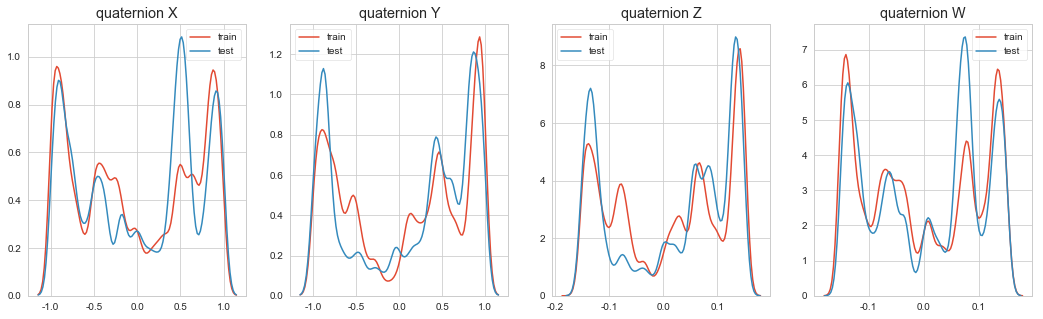

In [28]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(18, 5))

ax1.set_title('quaternion X')
sns.kdeplot(data['norm_X'], ax=ax1, label="train")
sns.kdeplot(test['norm_X'], ax=ax1, label="test")

ax2.set_title('quaternion Y')
sns.kdeplot(data['norm_Y'], ax=ax2, label="train")
sns.kdeplot(test['norm_Y'], ax=ax2, label="test")

ax3.set_title('quaternion Z')
sns.kdeplot(data['norm_Z'], ax=ax3, label="train")
sns.kdeplot(test['norm_Z'], ax=ax3, label="test")

ax4.set_title('quaternion W')
sns.kdeplot(data['norm_W'], ax=ax4, label="train")
sns.kdeplot(test['norm_W'], ax=ax4, label="test")

plt.show()

In [29]:
def fe_step1 (actual):
    x, y, z, w = actual['norm_X'].tolist(), actual['norm_Y'].tolist(), actual['norm_Z'].tolist(), actual['norm_W'].tolist()
    nx, ny, nz = [], [], []
    for i in range(len(x)):
        xx, yy, zz = quaternion_to_euler(x[i], y[i], z[i], w[i])
        nx.append(xx)
        ny.append(yy)
        nz.append(zz)
    
    actual['euler_x'] = nx
    actual['euler_y'] = ny
    actual['euler_z'] = nz
    return actual


In [30]:
data = fe_step1(data)
test = fe_step1(test)
print (data.shape)
data.head()


(487680, 22)


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,...,linear_acceleration_Z,norm_quat,mod_quat,norm_X,norm_Y,norm_Z,norm_W,euler_x,euler_y,euler_z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,...,-9.7532,0.999997,0.999999,-0.758531,-0.634351,-0.10488,-0.10597,2.843273,-0.024668,1.396667
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,...,-9.4128,0.999995,0.999998,-0.758532,-0.634342,-0.10490,-0.10600,2.843201,-0.024662,1.396651
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,...,-8.7267,1.000006,1.000003,-0.758528,-0.634348,-0.10492,-0.10597,2.843222,-0.024728,1.396677
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,...,-10.0960,1.000009,1.000005,-0.758516,-0.634357,-0.10495,-0.10597,2.843183,-0.024769,1.396712
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,...,-10.4410,0.999995,0.999997,-0.758522,-0.634352,-0.10495,-0.10596,2.843197,-0.024785,1.396698


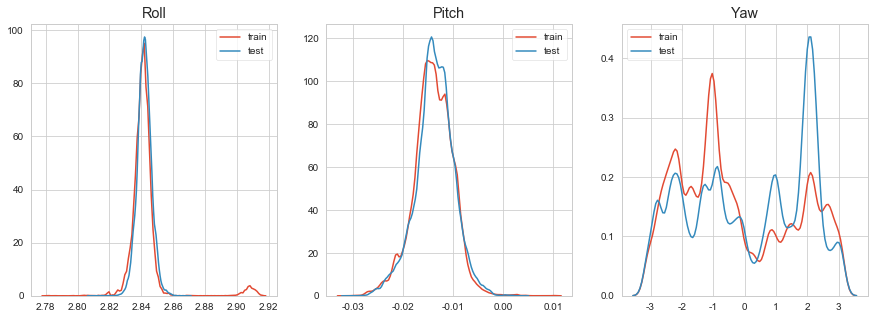

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))

ax1.set_title('Roll')
sns.kdeplot(train_x['euler_x'], ax=ax1, label="train")
sns.kdeplot(test['euler_x'], ax=ax1, label="test")

ax2.set_title('Pitch')
sns.kdeplot(train_x['euler_y'], ax=ax2, label="train")
sns.kdeplot(test['euler_y'], ax=ax2, label="test")

ax3.set_title('Yaw')
sns.kdeplot(train_x['euler_z'], ax=ax3, label="train")
sns.kdeplot(test['euler_z'], ax=ax3, label="test")

plt.show()

In [32]:
def feat_eng(data):
    
    df = pd.DataFrame()
    train_x['totl_anglr_vel'] = (train_x['angular_velocity_X']**2 + train_x['angular_velocity_Y']**2 + train_x['angular_velocity_Z']**2)** 0.5
    train_x['totl_linr_acc'] = (train_x['linear_acceleration_X']**2 + train_x['linear_acceleration_Y']**2 + train_x['linear_acceleration_Z']**2)**0.5
    train_x['totl_xyz'] = (train_x['orientation_X']**2 + train_x['orientation_Y']**2 + data['orientation_Z']**2)**0.5
    train_x['acc_vs_vel'] = train_x['totl_linr_acc'] / train_x['totl_anglr_vel']
    
    def mean_change_of_abs_change(x):
        return np.mean(np.diff(np.abs(np.diff(x))))
    
    for col in data.columns:
        if col in ['row_id','series_id','measurement_number']:
            continue
        df[col + '_mean'] = train_x.groupby(['series_id'])[col].mean()
        df[col + '_median'] = train_x.groupby(['series_id'])[col].median()
        df[col + '_max'] = train_x.groupby(['series_id'])[col].max()
        df[col + '_min'] = train_x.groupby(['series_id'])[col].min()
        df[col + '_std'] = train_x.groupby(['series_id'])[col].std()
        df[col + '_range'] = df[col + '_max'] - df[col + '_min']
        df[col + '_maxtoMin'] = df[col + '_max'] / df[col + '_min']
        df[col + '_mean_abs_chg'] = train_x.groupby(['series_id'])[col].apply(lambda x: np.mean(np.abs(np.diff(x))))
        df[col + '_mean_change_of_abs_change'] = train_x.groupby('series_id')[col].apply(mean_change_of_abs_change)
        df[col + '_abs_max'] = train_x.groupby(['series_id'])[col].apply(lambda x: np.max(np.abs(x)))
        df[col + '_abs_min'] = train_x.groupby(['series_id'])[col].apply(lambda x: np.min(np.abs(x)))
        df[col + '_abs_avg'] = (df[col + '_abs_min'] + df[col + '_abs_max'])/2
    return df

In [39]:
from scipy.stats import kurtosis
from scipy.stats import skew

def _kurtosis(x):
    return kurtosis(x)

def CPT5(x):
    den = len(x)*np.exp(np.std(x))
    return sum(np.exp(x))/den

def skewness(x):
    return skew(x)

def SSC(x):
    x = np.array(x)
    x = np.append(x[-1], x)
    x = np.append(x,x[1])
    xn = x[1:len(x)-1]
    xn_i2 = x[2:len(x)]    # xn+1 
    xn_i1 = x[0:len(x)-2]  # xn-1
    ans = np.heaviside((xn-xn_i1)*(xn-xn_i2),0)
    return sum(ans[1:]) 

def wave_length(x):
    x = np.array(x)
    x = np.append(x[-1], x)
    x = np.append(x,x[1])
    xn = x[1:len(x)-1]
    xn_i2 = x[2:len(x)]    # xn+1 
    return sum(abs(xn_i2-xn))
    
def norm_entropy(x):
    tresh = 3
    return sum(np.power(abs(x),tresh))

def SRAV(x):    
    SRA = sum(np.sqrt(abs(x)))
    return np.power(SRA/len(x),2)

def mean_abs(x):
    return sum(abs(x))/len(x)

def zero_crossing(x):
    x = np.array(x)
    x = np.append(x[-1], x)
    x = np.append(x,x[1])
    xn = x[1:len(x)-1]
    xn_i2 = x[2:len(x)]    # xn+1
    return sum(np.heaviside(-xn*xn_i2,0))

In [40]:
data.fillna(0,inplace=True)
test.fillna(0,inplace=True)
data.replace(-np.inf,0,inplace=True)
data.replace(np.inf,0,inplace=True)
test.replace(-np.inf,0,inplace=True)
test.replace(np.inf,0,inplace=True)

In [41]:
train_y['surface'] = le.fit_transform(train_y['surface'])

In [42]:
from sklearn.model_selection import KFold, StratifiedKFold
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=59)

predicted = np.zeros((test.shape[0],9))
measured= np.zeros((train_x.shape[0]))
score = 0

In [ ]:

train_x.drop(labels=['row_id','series_id','measurement_number'],axis=1,inplace=True)
test.drop(labels=['row_id','series_id','measurement_number'],axis=1,inplace=True)
train_x.drop(labels=range(0,1),axis=0,inplace=True)
test.drop(labels=range(0,1),axis=0,inplace=True)

In [44]:
print(train_x.head())
print(train_y.head())#对数据的基本把握

   orientation_X  orientation_Y  orientation_Z  orientation_W  \
1       -0.75853       -0.63434       -0.10490       -0.10600   
2       -0.75853       -0.63435       -0.10492       -0.10597   
3       -0.75852       -0.63436       -0.10495       -0.10597   
4       -0.75852       -0.63435       -0.10495       -0.10596   
5       -0.75853       -0.63439       -0.10483       -0.10580   

   angular_velocity_X  angular_velocity_Y  angular_velocity_Z  \
1            0.067851            0.029939            0.003385   
2            0.007275            0.028934           -0.005978   
3           -0.013053            0.019448           -0.008974   
4            0.005135            0.007652            0.005245   
5            0.059664            0.013043           -0.013231   

   linear_acceleration_X  linear_acceleration_Y  linear_acceleration_Z  \
1                0.33995                1.50640                -9.4128   
2               -0.26429                1.59220                -8.7267

以下是对knn和随机森林的测试，原理就是把train_x随机分组，然后一份用来学习，一份用来测试，最后比较得分。
经过测试，随机森林分数更高，最高为0.97

In [45]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(train_x,tr[1:],test_size=0.5)
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)       #之前看过鸢尾花识别的例子，用的就是knn，而且都是classification，所以我选了knn
print(knn.score(X_test,y_test))#knn模型得分为0.38—0.7

0.4826238517060367


In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(train_x,tr[1:],test_size=0.5)
model = RandomForestClassifier(n_estimators=500, n_jobs = -1)
model.fit(X_train,y_train)
model.predict(X_test)            #我查过资料。随机森林模型的平均性能最好，所以选择
print(model.score(X_test,y_test))#这个score最高竟然达到了0.9865，这个模型在关闭其他软件情况下才能运行，占内存很大

0.9865567585301838


In [46]:
model = RandomForestClassifier(n_estimators=500, n_jobs = -1)
model.fit(train_x,tr[1:])
print(model.predict(test))#随机森林模型，我的电脑内存小，经过多次尝试运行不了，总是显示内存不够用

[33 33 33 ... 46 46 46]


In [48]:
X_train,X_test,y_train,y_test=train_test_split(train_x,tr[1:],test_size=0.5)
knn=KNeighborsClassifier()
knn.fit(train_x,tr[1:])
print(knn.predict(test))#knn模型，可以运行成功

[35 35 28 ... 45 45 46]
